In [ ]:
# prompt: import drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install umap-learn

In [ ]:
!pip install scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 41.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 76.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-bio: filename=scikit_bio-0.6.3-cp311-cp311-linux_x86_64.whl size=7263135 sha256=fe6c0b0677bb88d6e32ebac4df9caba9482cfd3ae3a66d64d6db36944a922103
  Stored in directory: /root/.cache/pip/wheels/c9/11/a2/86492071506a487bcba7015b710a9e89d66ca69845512fb86c
  Created wheel for biom-format: filename=biom_format-2.1.16-cp311-cp311-linux_x86_64.whl size=12176857 sha256=e5d87c78709a83f2788130ede861cdbcc8f96175abde9c4328d0a5c644cdeee6
  Stored in directory: /root/.cache/pip/wheels/a5/6b/58/a879e8fbae2479a3d1a68719f3a062fe62701d6494f1b74f5e
Successf

In [ ]:
import skbio

In [ ]:
skbio.stats.distance.permanova

<function skbio.stats.distance._permanova.permanova(distance_matrix, grouping, column=None, permutations=999, seed=None)>

In [ ]:
import skbio
from sklearn.metrics import pairwise_distances

In [ ]:
from itertools import product
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity
import umap

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
!pip install neuroCombat
from neuroCombat import neuroCombat
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.gridspec as gridspec
import gzip

  Preparing metadata (setup.py) ... done
  Created wheel for neuroCombat: filename=neuroCombat-0.2.12-py3-none-any.whl size=6353 sha256=7c3d021ac3bf30000f2a6e2194e8e1a46541eb0522e1ded0405dc1fe5b30bb54
  Stored in directory: /root/.cache/pip/wheels/b0/f8/c9/375ca529543b8b0a6abc4d9243e8d951209220c1a6dc892f24
Successfully built neuroCombat


### Hyperparameter

K : number of top cosine similarity

In [ ]:
k=5

### Data Import

In [ ]:
# Define the base folder path to your project directory in Google Drive
Ds_project_folder_path = '/content/drive/MyDrive/DS_project/'
data_spliting_meta_data_path = 'Data/5_Inter-cohort_preprocessing/5.1.data_spliting/'
splited_data_save_path = 'Data/5_Inter-cohort_preprocessing/5.2.data_cleaning(Feature_filtering)/'
batch_correction_save_path = 'Data/5_Inter-cohort_preprocessing/5.3.1.batch_correction/'

In [ ]:
file_dir = Ds_project_folder_path + splited_data_save_path
save_dir = Ds_project_folder_path + batch_correction_save_path

In [ ]:
GBM_methylation_450_sample = pd.read_csv(f'{save_dir}TCGA-GBM_methy450_samples.csv', index_col=0)
GBM_methylation_270_sample = pd.read_csv(f'{save_dir}TCGA-GBM_methy270_samples.csv', index_col=0)

In [ ]:
#Methlyation
GBM_methylation_train = pd.read_csv(f'{file_dir}GBM_methylation_train.csv', index_col=0)
GBM_methylation_val= pd.read_csv(f'{file_dir}GBM_methylation_val.csv', index_col=0)
GBM_methylation_external_test= pd.read_csv(f'{file_dir}GBM_methylation_external_test.csv', index_col=0)
GBM_methylation_internal_test= pd.read_csv(f'{file_dir}GBM_methylation_internal_test.csv', index_col=0)

LGG_methylation_train= pd.read_csv(f'{file_dir}LGG_methylation_train.csv', index_col=0)
LGG_methylation_val= pd.read_csv(f'{file_dir}LGG_methylation_val.csv', index_col=0)
LGG_methylation_external_test= pd.read_csv(f'{file_dir}LGG_methylation_external_test.csv', index_col=0)
LGG_methylation_internal_test= pd.read_csv(f'{file_dir}LGG_methylation_internal_test.csv', index_col=0)

#Protein
# GBM_protein_train = pd.read_csv(f'{file_dir}GBM_protein_train.csv', index_col=0)
# GBM_protein_val= pd.read_csv(f'{file_dir}GBM_protein_val.csv', index_col=0)
# GBM_protein_external_test= pd.read_csv(f'{file_dir}GBM_protein_external_test.csv', index_col=0)
# GBM_protein_internal_test= pd.read_csv(f'{file_dir}GBM_protein_internal_test.csv', index_col=0)

# LGG_protein_train= pd.read_csv(f'{file_dir}LGG_protein_train.csv', index_col=0)
# LGG_protein_val= pd.read_csv(f'{file_dir}LGG_protein_val.csv', index_col=0)
# LGG_protein_external_test= pd.read_csv(f'{file_dir}LGG_protein_external_test.csv', index_col=0)
# LGG_protein_internal_test= pd.read_csv(f'{file_dir}LGG_protein_internal_test.csv', index_col=0)

# #RNA_seq
# GBM_rna_seq_train = pd.read_csv(f'{file_dir}GBM_rna_seq_train.csv', index_col=0)
# GBM_rna_seq_val= pd.read_csv(f'{file_dir}GBM_rna_seq_val.csv', index_col=0)
# GBM_rna_seq_external_test= pd.read_csv(f'{file_dir}GBM_rna_seq_external_test.csv', index_col=0)
# GBM_rna_seq_internal_test= pd.read_csv(f'{file_dir}GBM_rna_seq_internal_test.csv', index_col=0)

# LGG_rna_seq_train= pd.read_csv(f'{file_dir}LGG_rna_seq_train.csv', index_col=0)
# LGG_rna_seq_val= pd.read_csv(f'{file_dir}LGG_rna_seq_val.csv', index_col=0)
# LGG_rna_seq_external_test= pd.read_csv(f'{file_dir}LGG_rna_seq_external_test.csv', index_col=0)
# LGG_rna_seq_internal_test= pd.read_csv(f'{file_dir}LGG_rna_seq_internal_test.csv', index_col=0)

# #CNV
# GBM_CNV_train = pd.read_csv(f'{file_dir}GBM_CNV_train.csv', index_col=0)
# GBM_CNV_val= pd.read_csv(f'{file_dir}GBM_CNV_val.csv', index_col=0)
# GBM_CNV_external_test= pd.read_csv(f'{file_dir}GBM_CNV_external_test.csv', index_col=0)
# GBM_CNV_internal_test= pd.read_csv(f'{file_dir}GBM_CNV_internal_test.csv', index_col=0)

# LGG_CNV_train= pd.read_csv(f'{file_dir}LGG_CNV_train.csv', index_col=0)
# LGG_CNV_val= pd.read_csv(f'{file_dir}LGG_CNV_val.csv', index_col=0)
# LGG_CNV_external_test= pd.read_csv(f'{file_dir}LGG_CNV_external_test.csv', index_col=0)
# LGG_CNV_internal_test= pd.read_csv(f'{file_dir}LGG_CNV_internal_test.csv', index_col=0)

# #SNV
# GBM_SNV_train = pd.read_csv(f'{file_dir}GBM_SNV_train.csv', index_col=0)
# GBM_SNV_val= pd.read_csv(f'{file_dir}GBM_SNV_val.csv', index_col=0)
# GBM_SNV_external_test= pd.read_csv(f'{file_dir}GBM_SNV_external_test.csv', index_col=0)
# GBM_SNV_internal_test= pd.read_csv(f'{file_dir}GBM_SNV_internal_test.csv', index_col=0)

# LGG_SNV_train= pd.read_csv(f'{file_dir}LGG_SNV_train.csv', index_col=0)
# LGG_SNV_val= pd.read_csv(f'{file_dir}LGG_SNV_val.csv', index_col=0)
# LGG_SNV_external_test= pd.read_csv(f'{file_dir}LGG_SNV_external_test.csv', index_col=0)
# LGG_SNV_internal_test= pd.read_csv(f'{file_dir}LGG_SNV_internal_test.csv', index_col=0)

In [ ]:
Ds_project_folder_path + data_spliting_meta_data_path

'/content/drive/MyDrive/DS_project/Data/5_Inter-cohort_preprocessing/5.1.data_spliting/'

In [ ]:
with open(Ds_project_folder_path + data_spliting_meta_data_path +'GBM_data_split_result.pickle', 'rb') as f:
    GBM_data_split_result = pickle.load(f)

with open(Ds_project_folder_path + data_spliting_meta_data_path +'LGG_data_split_result.pickle', 'rb') as f:
    LGG_data_split_result = pickle.load(f)

### Batch Correction

In [ ]:
# making meta_file
GBM_train_meta_data = {sample: sample.split('-')[1] for sample in GBM_data_split_result['Train']}
GBM_train_meta_data_df = pd.DataFrame(list(GBM_train_meta_data.items()), columns=['sample', 'platform'])
GBM_train_meta_data_df = GBM_train_meta_data_df.set_index("sample")

GBM_internal_test_meta_data = {sample: sample.split('-')[1] for sample in GBM_data_split_result['Internal Test']}
GBM_internal_test_meta_data_df = pd.DataFrame(list(GBM_internal_test_meta_data.items()), columns=['sample', 'platform'])
GBM_internal_test_meta_data_df = GBM_internal_test_meta_data_df.set_index("sample")

GBM_external_test_meta_data = {sample: sample.split('-')[1] for sample in GBM_data_split_result['External Test']}
GBM_external_test_meta_data_df = pd.DataFrame(list(GBM_external_test_meta_data.items()), columns=['sample', 'platform'])
GBM_external_test_meta_data_df = GBM_external_test_meta_data_df.set_index("sample")

GBM_val_meta_data = {sample: sample.split('-')[1] for sample in GBM_data_split_result['Validation']}
GBM_val_meta_data_df = pd.DataFrame(list(GBM_val_meta_data.items()), columns=['sample', 'platform'])
GBM_val_meta_data_df = GBM_val_meta_data_df.set_index("sample")


LGG_train_meta_data = {sample: sample.split('-')[1] for sample in LGG_data_split_result['Train']}
LGG_train_meta_data_df = pd.DataFrame(list(LGG_train_meta_data.items()), columns=['sample', 'platform'])
LGG_train_meta_data_df = LGG_train_meta_data_df.set_index("sample")

LGG_internal_test_meta_data = {sample: sample.split('-')[1] for sample in LGG_data_split_result['Internal Test']}
LGG_internal_test_meta_data_df = pd.DataFrame(list(LGG_internal_test_meta_data.items()), columns=['sample', 'platform'])
LGG_internal_test_meta_data_df = LGG_internal_test_meta_data_df.set_index("sample")

LGG_external_test_meta_data = {sample: sample.split('-')[1] for sample in LGG_data_split_result['External Test']}
LGG_external_test_meta_data_df = pd.DataFrame(list(LGG_external_test_meta_data.items()), columns=['sample', 'platform'])
LGG_external_test_meta_data_df = LGG_external_test_meta_data_df.set_index("sample")

LGG_val_meta_data = {sample: sample.split('-')[1] for sample in LGG_data_split_result['Validation']}
LGG_val_meta_data_df = pd.DataFrame(list(LGG_val_meta_data.items()), columns=['sample', 'platform'])
LGG_val_meta_data_df = LGG_val_meta_data_df.set_index("sample")

In [ ]:
def impute_with_mask(df):
    """
    Fill NA values using gene-wise mean and return both the imputed DataFrame
    and a boolean mask indicating original NA positions.

    Returns:
        df_filled (DataFrame): Imputed DataFrame
        na_mask (DataFrame): Boolean mask where True indicates original NA
    """
    na_mask = df.isna()
    df_filled = df.T.fillna(df.mean(axis=1)).T
    return df_filled, na_mask

def restore_na(df_filled, na_mask):
    """
    Restore original NA values in a DataFrame using a boolean mask.

    Returns:
        DataFrame with NAs restored
    """
    df_restored = df_filled.copy()
    df_restored[na_mask] = pd.NA
    return df_restored

In [ ]:
def batch_correction_for_train_data(train_data, train_meta_data, batch_column='platform'):
    """
    Perform batch correction using neuroCombat on training data.
    Excludes batches with fewer than 2 samples, then recombines the excluded data.

    Parameters:
        train_data (pd.DataFrame): gene x sample matrix
        train_meta_data (pd.DataFrame): sample metadata (indexed by sample names)
        batch_column (str): name of column indicating batch (e.g., 'platform')

    Returns:
        full_corrected_data (pd.DataFrame): neuroCombat-corrected train data (including uncorrected samples)
        parameter (dict): neuroCombat estimated parameters
        excluded_samples (List[str]): samples that were excluded from correction
    """
    # Step 1. Filter batches with at least 2 samples
    batch_counts = train_meta_data[batch_column].value_counts()
    valid_batches = batch_counts[batch_counts >= 2].index

    included_samples = train_meta_data[train_meta_data[batch_column].isin(valid_batches)].index
    excluded_samples = train_meta_data[~train_meta_data[batch_column].isin(valid_batches)].index

    included_data = train_data[included_samples]
    included_meta = train_meta_data.loc[included_samples]

    excluded_data = train_data[excluded_samples]

    # Step 2. Impute missing values (using external function)
    included_filled, na_mask = impute_with_mask(included_data)

    # Step 3. Apply neuroCombat
    from neuroCombat import neuroCombat
    combat_result = neuroCombat(dat=included_filled, covars=included_meta, batch_col=batch_column)

    corrected = pd.DataFrame(combat_result['data'], index=included_data.index, columns=included_data.columns)

    # Step 4. Fill residual NaNs with row mean and restore original NAs
    corrected = corrected.fillna(corrected.mean(axis=1), axis=0)
    corrected_with_na = restore_na(corrected, na_mask)

    # Step 5. Combine corrected + excluded (excluded = uncorrected)
    full_corrected_data = pd.concat([corrected_with_na, excluded_data], axis=1)[train_data.columns]

    # Step 6. Return
    return full_corrected_data, combat_result['estimates'], list(excluded_samples)

def check_gene_order(train_data, test_data):
    """
    Checks if gene (row) order is identical between train and test DataFrames.

    Parameters:
        train_data (pd.DataFrame): Train expression matrix (genes x samples)
        test_data (pd.DataFrame): Test expression matrix (genes x samples)

    Returns:
        bool: True if order matches, False otherwise
    """
    if list(train_data.index) == list(test_data.index):
        print("Gene order is identical between train and test.")
        return True
    else:
        print("Gene order does NOT match between train and test!")
        return False

In [ ]:
def apply_neurocombat_to_test_data(test_data, test_meta, parameter, batch_column='platform'):
    """
    Apply neuroCombat batch correction to test data using parameters learned from train data.

    Parameters:
        test_data (pd.DataFrame): gene x sample test expression matrix
        test_meta (pd.DataFrame): metadata including batch info
        parameter (dict): neuroCombat output parameter dictionary
        batch_column (str): column name in metadata for batch labels

    Returns:
        pd.DataFrame: batch-corrected test data (with original NAs restored)
    """

    # Step 1: Fill NA and save mask
    test_data_filled, na_mask = impute_with_mask(test_data)

    # Step 2: Parse neuroCombat parameters
    gene_ids = test_data.index
    batch_names = parameter['batches']

    gamma = pd.DataFrame(parameter['gamma.star'].T, index=gene_ids, columns=batch_names)
    delta = pd.DataFrame(parameter['delta.star'].T, index=gene_ids, columns=batch_names)
    pooled_var = pd.Series(parameter['var.pooled'].flatten(), index=gene_ids)
    stand_mean = pd.Series(parameter['stand.mean'][:, 0], index=gene_ids)

    # Step 3: Get batch info
    samples = test_data.columns
    batches = test_meta.loc[samples, batch_column].values  # ensure correct order

    # Step 4: Apply correction sample-by-sample
    corrected_data = test_data_filled.copy()
    for i, sample in enumerate(samples):
        batch = batches[i]
        if batch not in gamma.columns:
            raise ValueError(f"Batch '{batch}' not found in training batches.")

        gamma_b = gamma[batch]
        delta_b = delta[batch]

        corrected = (
            (corrected_data[sample] - gamma_b) / np.sqrt(delta_b)
        ) * np.sqrt(pooled_var) + stand_mean

        corrected_data[sample] = corrected

    # Step 5: Restore original NAs
    corrected_data_restored = restore_na(corrected_data, na_mask)

    return corrected_data_restored

In [ ]:
def best_batch_mapping_neurocombat(
    test_data,
    test_meta,
    parameter,
    batch_col='platform',
    cutoff_score=None
):

    # Step 1: Identify known and unknown batches
    known_batches = list(parameter['batches'])
    all_test_batches = list(test_meta[batch_col].unique())
    unknown_batches = [b for b in all_test_batches if b not in known_batches]

    # No unknown batch: apply directly
    if not unknown_batches:
        print("✅ No unknown batches. Applying correction directly.")
        corrected = apply_neurocombat_to_test_data(
            test_data, test_meta, parameter, batch_column=batch_col
        )
        return {}, 0.0, corrected

    # Step 2: generate all possible mappings
    mapping_candidates = list(product(known_batches, repeat=len(unknown_batches)))
    best_score = float('inf')
    best_mapping = None
    best_corrected = None

    for mapping in tqdm(mapping_candidates, desc="Searching best batch mapping"):
        mapping_dict = dict(zip(unknown_batches, mapping))

        # Step 3: Apply mapping to metadata
        mapped_meta = test_meta.copy()
        mapped_meta[batch_col] = mapped_meta[batch_col].apply(
            lambda b: mapping_dict[b] if b in mapping_dict else b
        )

        try:
            # Step 4: Apply neuroCombat correction
            corrected = apply_neurocombat_to_test_data(
                test_data, mapped_meta, parameter, batch_column=batch_col
            )

            # Step 5: Impute temporarily for silhouette score
            corrected_filled, _ = impute_with_mask(corrected)

            # Step 6: Check if multiple batch labels exist
            labels = mapped_meta.loc[corrected.columns][batch_col].values
            if len(np.unique(labels)) < 2:
                raise ValueError("Only one batch label after mapping. Silhouette score requires ≥2.")

            # Step 7: PCA + silhouette score
            X = PCA(n_components=10).fit_transform(corrected_filled.T)
            score = silhouette_score(X, labels)
            print(score)

            # Step 8: Compare by distance from 0 (closer to 0 is better)
            if abs(score) < abs(best_score):
                best_score = score
                best_mapping = mapping_dict
                best_corrected = corrected

                if cutoff_score is not None and abs(score) <= cutoff_score:
                    print(f"Early stopping: abs(score) = {abs(score):.4f} <= cutoff {cutoff_score:.4f}")
                    break

        except Exception as e:
            print(f"Mapping failed: {mapping_dict}, error: {e}")
            continue

    return best_mapping, best_score, best_corrected

In [ ]:
def evaluate_correction(train, train_cor, metadata, batch_col = 'platform', output_path=None, title=None):
    train, _ = impute_with_mask(train)
    train_cor, _ = impute_with_mask(train_cor)

    metadata = metadata.loc[train.columns]

    pca_train = PCA(n_components=2)
    coords_train = pca_train.fit_transform(train.T)

    pca_corr = PCA(n_components=2)
    coords_corr = pca_corr.fit_transform(train_cor.T)

    # batch label
    batches = metadata[batch_col].values

    # Silhouette score
    silhouette_scores = {}
    coords_train_score = StandardScaler().fit_transform(train.T)
    coords_corr_score = StandardScaler().fit_transform(train_cor.T)

    score_train = silhouette_score(coords_train_score, batches)
    score_corr = silhouette_score(coords_corr_score, batches)

    silhouette_scores["Before"] = score_train
    silhouette_scores["After"] = score_corr

    # Plot
    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1.2, 1.2, 0.6])

    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    axes = [ax1, ax2, ax3]

    for i, (coords, label) in enumerate(zip([coords_train, coords_corr], ["Before", "After"])):
        ax = axes[i]
        for b in np.unique(batches):
            idx = np.where(batches == b)[0]
            ax.scatter(coords[idx, 0], coords[idx, 1], label=b, alpha=0.7)
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.set_title(f"{label} Batch Correction")
        ax.legend()

    # Bar plot
    axes[2].bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
    axes[2].set_ylabel("Silhouette Score")
    axes[2].set_title("Silhouette Comparison")

    plt.suptitle(title or "Batch Correction PCA Evaluation")
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
def combat_by_weighted_similarity(
    test_data,
    test_meta,
    train_data,
    train_meta,
    parameter,
    k=3,
    batch_col='platform'
):
    test_mean = test_data.mean(axis=1)

    known_batches = list(parameter['batches'])
    train_means = {}
    for b in known_batches:
        samples_in_batch = train_meta[train_meta[batch_col] == b].index
        intersected = [s for s in samples_in_batch if s in train_data.columns]
        if intersected:
            train_means[b] = train_data[intersected].mean(axis=1)

    if not train_means:
        raise ValueError("No matching train batches found in train data.")

    # Step 3: cosine similarity 계산
    train_matrix = pd.DataFrame(train_means)
    sim = cosine_similarity(test_mean.values.reshape(1, -1), train_matrix.fillna(0).T.values)[0]
    top_k_idx = np.argsort(sim)[-k:]
    top_batches = [list(train_means.keys())[i] for i in top_k_idx]
    weights = sim[top_k_idx] / np.sum(sim[top_k_idx])

    # Step 4: 각 후보 batch로 간주하고 ComBat 수행
    results = []
    for i, b in enumerate(top_batches):
        mapped_meta = test_meta.copy()
        mapped_meta[batch_col] = b
        try:
            corrected = apply_neurocombat_to_test_data(test_data, mapped_meta, parameter, batch_column=batch_col)
            corrected_filled, na_mask = impute_with_mask(corrected)
            results.append(corrected_filled * weights[i])
        except Exception as e:
            print(f"Error for batch {b}: {e}")
            continue

    if not results:
        raise ValueError("No valid correction could be applied from any similar batches.")
    weighted_sum = sum(results)
    return restore_na(weighted_sum, na_mask)

In [ ]:
def evaluate_correction(
    train,
    train_cor,
    metadata,
    batch_col='platform',
    group_col=None,
    use_umap=False,
    output_path=None,
    title=None
):

    train, _ = impute_with_mask(train)
    train_cor, _ = impute_with_mask(train_cor)

    metadata = metadata.loc[train.columns]
    batches = metadata[batch_col].values
    group_labels = metadata[group_col].values if group_col else None

    silhouette_scores = {}
    group_silhouette_scores = {}

    if use_umap:
        reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=42)
        coords_train = reducer.fit_transform(StandardScaler().fit_transform(train.T))
        coords_corr = reducer.fit_transform(StandardScaler().fit_transform(train_cor.T))
        xlabel, ylabel = "UMAP1", "UMAP2"
    else:
        pca = PCA(n_components=2)
        coords_train = pca.fit_transform(train.T)
        var_ratio = pca.explained_variance_ratio_ * 100
        xlabel = f"PC1 ({var_ratio[0]:.1f}%)"
        ylabel = f"PC2 ({var_ratio[1]:.1f}%)"

        pca = PCA(n_components=2)
        coords_corr = pca.fit_transform(train_cor.T)

    # Silhouette score: batch 기준
    silhouette_scores["Before"] = silhouette_score(coords_train, batches)
    silhouette_scores["After"] = silhouette_score(coords_corr, batches)

    # Silhouette score: group 기준 (e.g. GBM/LGG)
    if group_col:
        group_silhouette_scores["Before"] = silhouette_score(coords_train, group_labels)
        group_silhouette_scores["After"] = silhouette_score(coords_corr, group_labels)

    # 시각화
    fig = plt.figure(figsize=(22, 5))
    gs = gridspec.GridSpec(1, 5, width_ratios=[1.2, 1.2, 0.6, 0.6, 1.2])
    ax1, ax2, ax3, ax4, ax5 = [fig.add_subplot(gs[i]) for i in range(5)]

    for ax, coords, label in zip([ax1, ax2], [coords_train, coords_corr], ["Before", "After"]):
        for b in np.unique(batches):
            idx = np.where(batches == b)[0]
            ax.scatter(coords[idx, 0], coords[idx, 1], label=b, alpha=0.7)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_title(f"{label} Batch")
        ax.legend(fontsize=7)

    # Batch 기준 Silhouette bar
    ax3.bar(silhouette_scores.keys(), silhouette_scores.values(), color='skyblue')
    ax3.set_ylabel("Silhouette Score")
    ax3.set_title("By Batch")

    # Group 기준 Silhouette bar
    if group_col:
        ax4.bar(group_silhouette_scores.keys(), group_silhouette_scores.values(), color='lightgreen')
        ax4.set_ylabel("Silhouette Score")
        ax4.set_title(f"By {group_col}")

        # 색깔 scatter
        cmap = plt.get_cmap("tab10")
        color_dict = {k: cmap(i) for i, k in enumerate(np.unique(group_labels))}
        colors = [color_dict[c] for c in group_labels]

        ax5.scatter(coords_corr[:, 0], coords_corr[:, 1], c=colors, alpha=0.8)
        ax5.set_xlabel(xlabel)
        ax5.set_ylabel(ylabel)
        ax5.set_title(f"{group_col} (Corrected)")
        for key, val in color_dict.items():
            ax5.scatter([], [], c=[val], label=key)
        ax5.legend(title=group_col, fontsize=8)

    plt.suptitle(title or f"Batch Correction Evaluation ({'UMAP' if use_umap else 'PCA'})")
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, dpi=300)
    plt.show()
    plt.close()


In [ ]:
def make_super_meta(GBM_meta, LGG_meta):
  meta_GBM= pd.DataFrame({'cancer_type': ['GBM' for _ in range(len(GBM_meta))]}, index = GBM_meta.index)
  meta_LGG= pd.DataFrame({'cancer_type': ['LGG' for _ in range(len(LGG_meta))]}, index = LGG_meta.index)
  super_meta_GBM = pd.concat([GBM_meta, meta_GBM], axis = 1)
  super_meta_LGG = pd.concat([LGG_meta, meta_LGG], axis = 1)
  super_meta = pd.concat([super_meta_GBM, super_meta_LGG])

  return super_meta

In [ ]:
def permanova_batch(data, batch_labels):
  pass

#### Methylation

TCGA-GBM 27 and 450

In [ ]:
GBM_450_sample = [sample.split('\t')[0].replace('.','-') for sample in GBM_methylation_450_sample.index]
GBM_27_sample = [sample.split('\t')[0].replace('.','-') for sample in GBM_methylation_270_sample.index]

filtered_train_GBM_450_sample = [sample for sample in GBM_450_sample if sample in GBM_methylation_train.columns]
filtered_train_GBM_27_sample = [sample for sample in GBM_27_sample if sample in GBM_methylation_train.columns]

filtered_train_GBM_450_sample = list(set(filtered_train_GBM_450_sample) - set(filtered_train_GBM_27_sample) & set(filtered_train_GBM_450_sample))

In [ ]:
# make metafile
def make_450_27_meta(total_sample_list, GBM_450_sample, GBM_27_sample):
  GBM_450_27_meta = []
  for sample in total_sample_list.columns:
    if sample in GBM_450_sample:
      GBM_450_27_meta.append([sample, '450'])
    else:
      GBM_450_27_meta.append([sample, '27'])
  GBM_450_27_meta = pd.DataFrame(GBM_450_27_meta, columns=['sample_id', 'platform'])
  GBM_450_27_meta = GBM_450_27_meta.set_index("sample_id")

  return GBM_450_27_meta

In [ ]:
GBM_train_450_27_meta = make_450_27_meta(GBM_methylation_train, filtered_train_GBM_450_sample, filtered_train_GBM_27_sample)
GBM_val_450_27_meta = make_450_27_meta(GBM_methylation_val, filtered_train_GBM_450_sample, filtered_train_GBM_27_sample)
GBM_external_test_450_27_meta = make_450_27_meta(GBM_methylation_external_test, filtered_train_GBM_450_sample, filtered_train_GBM_27_sample)
GBM_internal_test_450_27_meta = make_450_27_meta(GBM_methylation_internal_test, filtered_train_GBM_450_sample, filtered_train_GBM_27_sample)

In [ ]:
GBM_methylation_train_450_27_batch_corrected, batch_correction_450_27_parameter, _ = batch_correction_for_train_data(GBM_methylation_train, GBM_train_450_27_meta)

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


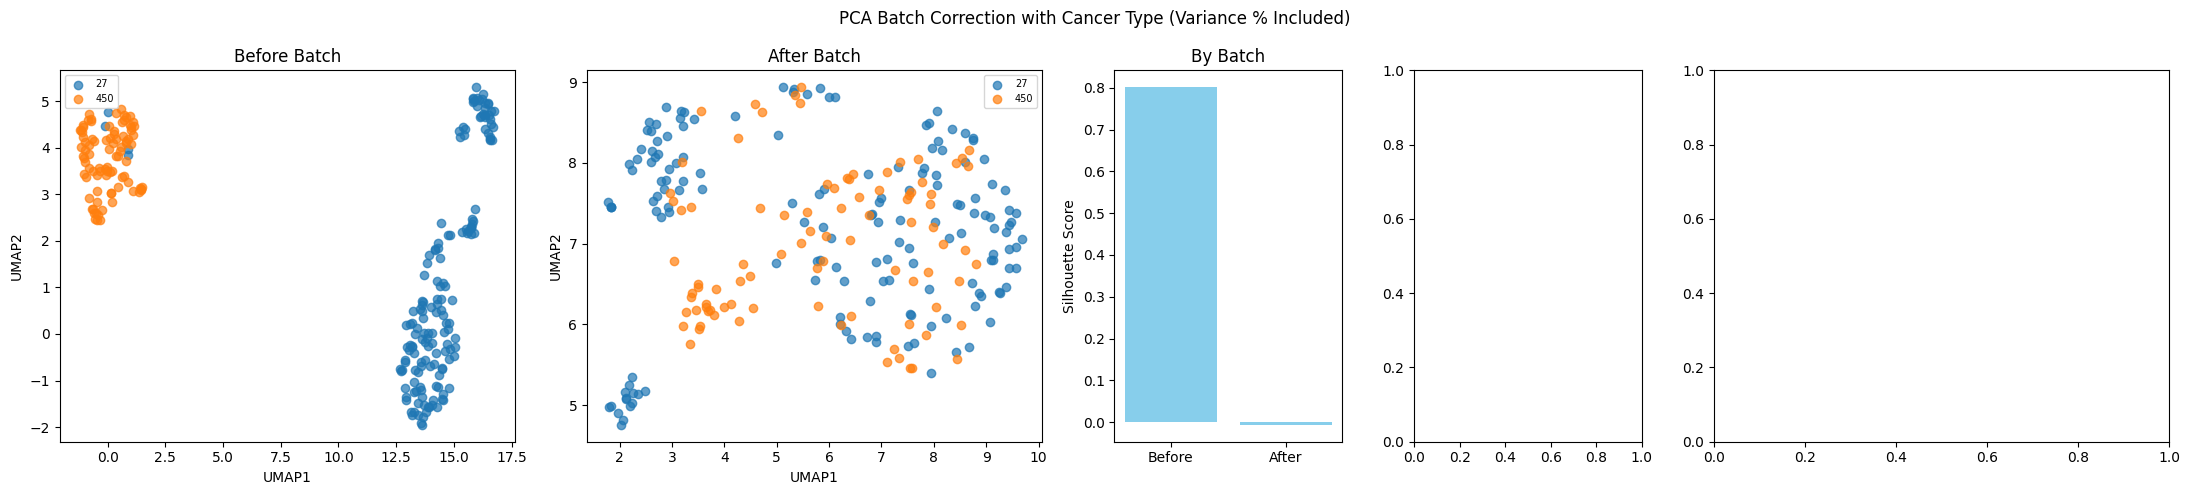

In [ ]:
evaluate_correction(
    train=GBM_methylation_train,
    train_cor=GBM_methylation_train_450_27_batch_corrected,
    metadata=GBM_train_450_27_meta,
    batch_col='platform',
    group_col=None,
    use_umap=True,  # PCA
    title="PCA Batch Correction with Cancer Type (Variance % Included)"
)

In [ ]:
print(check_gene_order(GBM_methylation_train, GBM_methylation_val))
print(check_gene_order(GBM_methylation_train, GBM_methylation_external_test))
print(check_gene_order(GBM_methylation_train, GBM_methylation_internal_test))

Gene order is identical between train and test.
True
Gene order is identical between train and test.
True
Gene order is identical between train and test.
True


In [ ]:
GBM_methylation_val_450_27_batch_corrected = apply_neurocombat_to_test_data(GBM_methylation_val, GBM_val_450_27_meta, batch_correction_450_27_parameter)
GBM_methylation_test_external_450_27_batch_corrected = apply_neurocombat_to_test_data(GBM_methylation_external_test, GBM_external_test_450_27_meta, batch_correction_450_27_parameter)
GBM_methylation_internal_test_450_27_batch_corrected = apply_neurocombat_to_test_data(GBM_methylation_internal_test, GBM_internal_test_450_27_meta, batch_correction_450_27_parameter)

In [ ]:
print(len(GBM_methylation_train.columns))
print(len(GBM_methylation_val.columns))
print(len(GBM_methylation_external_test.columns))
print(len(GBM_methylation_internal_test.columns))



249
48
49
66


In [ ]:
print(len(GBM_methylation_train_450_27_batch_corrected.columns))
print(len(GBM_methylation_val_450_27_batch_corrected.columns))
print(len(GBM_methylation_test_external_450_27_batch_corrected.columns))
print(len(GBM_methylation_internal_test_450_27_batch_corrected.columns))



249
48
49
66


In [ ]:
GBM_methylation_train_450_27_batch_corrected.to_csv(Ds_project_folder_path + batch_correction_save_path + 'GBM_methylation_450_27_batch_corrected_train.csv')
GBM_methylation_val_450_27_batch_corrected.to_csv(Ds_project_folder_path + batch_correction_save_path + 'GBM_methylation_450_27_batch_corrected_val.csv')
GBM_methylation_test_external_450_27_batch_corrected.to_csv(Ds_project_folder_path + batch_correction_save_path + 'GBM_methylation_450_27_batch_corrected_external_test.csv')
GBM_methylation_internal_test_450_27_batch_corrected.to_csv(Ds_project_folder_path + batch_correction_save_path + 'GBM_methylation_450_27_batch_corrected_internal_test.csv')

-------------------------------------------------------
You should run here. below code is just for other batch correction.
but since there is no overlap label in GMB and LGG, we can't do batch correction. there is just trial.

#### sample source correction

In [ ]:
#permutation method <- candidate 1


#_, _, GBM_methylation_val_batch_corrected = best_batch_mapping_neurocombat(
#    test_data=GBM_methylation_val,
#    test_meta=GBM_val_plate_meta,
#    parameter=GBM_methyl_batch_correction_parameter,
#    batch_col='platform'
#)

#_, _, GBM_methylation_test_external_batch_corrected = best_batch_mapping_neurocombat(
#    test_data=GBM_methylation_external_test,
#    test_meta=GBM_external_test_plate_meta,
#    parameter=GBM_methyl_batch_correction_parameter,
#    batch_col='platform'
#)

In [ ]:
GBM_train_plate_meta = GBM_train_meta_data_df.loc[GBM_methylation_train_450_27_batch_corrected.columns]
GBM_val_plate_meta = GBM_val_meta_data_df.loc[GBM_methylation_val_450_27_batch_corrected.columns]
GBM_external_test_plate_meta = GBM_external_test_meta_data_df.loc[GBM_methylation_test_external_450_27_batch_corrected.columns]
GBM_internal_test_plate_meta = GBM_internal_test_meta_data_df.loc[GBM_methylation_internal_test_450_27_batch_corrected.columns]

LGG_train_plate_meta = LGG_train_meta_data_df.loc[LGG_methylation_train.columns]
LGG_val_plate_meta = LGG_val_meta_data_df.loc[LGG_methylation_val.columns]
LGG_external_test_plate_meta = LGG_external_test_meta_data_df.loc[LGG_methylation_external_test.columns]
LGG_internal_test_plate_meta = LGG_internal_test_meta_data_df.loc[LGG_methylation_internal_test.columns]

In [ ]:
methylation_train_plate_meta = pd.concat([GBM_train_plate_meta, LGG_train_plate_meta])
methylation_val_plate_meta = pd.concat([GBM_val_plate_meta, LGG_val_plate_meta])
methylation_external_test_plate_meta = pd.concat([GBM_external_test_plate_meta, LGG_external_test_plate_meta])
methylation_internal_test_plate_meta = pd.concat([GBM_internal_test_plate_meta, LGG_internal_test_plate_meta])

In [ ]:
methylation_train = pd.concat([GBM_methylation_train_450_27_batch_corrected, LGG_methylation_train], axis = 1)
methylation_val = pd.concat([GBM_methylation_val_450_27_batch_corrected, LGG_methylation_val], axis = 1)
methylation_external_test = pd.concat([GBM_methylation_test_external_450_27_batch_corrected, LGG_methylation_external_test], axis = 1)
methylation_internal_test = pd.concat([GBM_methylation_internal_test_450_27_batch_corrected, LGG_methylation_internal_test], axis = 1)

In [ ]:
methylation_train_batch_corrected, GBM_methyl_batch_correction_parameter, ex_list = batch_correction_for_train_data(methylation_train, methylation_train_plate_meta, batch_column='platform')

[neuroCombat] Creating design matrix
[neuroCombat] Standardizing data across features
[neuroCombat] Fitting L/S model and finding priors
[neuroCombat] Finding parametric adjustments
[neuroCombat] Final adjustment of data


In [ ]:
methylation_train_plate_meta = methylation_train_plate_meta.drop(ex_list)
methylation_train_for_test = methylation_train.drop(ex_list, axis =1)

In [ ]:
methylation_external_corrected_test = combat_by_weighted_similarity(
    test_data=methylation_external_test,
    test_meta=methylation_external_test_plate_meta,
    train_data=methylation_train_for_test,
    train_meta=methylation_train_plate_meta,
    parameter=GBM_methyl_batch_correction_parameter,
    k=k,
    batch_col='platform'
)

methylation_internal_corrected_test = combat_by_weighted_similarity(
    test_data=methylation_internal_test,
    test_meta=methylation_internal_test_plate_meta,
    train_data=methylation_train_for_test,
    train_meta=methylation_train_plate_meta,
    parameter=GBM_methyl_batch_correction_parameter,
    k=k,
    batch_col='platform'
)

methylation_val_corrected = combat_by_weighted_similarity(
    test_data=methylation_val,
    test_meta=methylation_val_plate_meta,
    train_data=methylation_train_for_test,
    train_meta=methylation_train_plate_meta,
    parameter=GBM_methyl_batch_correction_parameter,
    k=k,
    batch_col='platform'
)

In [ ]:
def permanova_batch(data, batch_labels):
  pass

In [ ]:
methylation_external_corrected_test.T.to_numpy().shape

(119, 19471)

In [ ]:
batch_labels = [methylation_external_test_plate_meta.loc[sample].values[0] for sample in methylation_external_corrected_test.columns]

In [ ]:
a, _ = impute_with_mask(methylation_external_corrected_test)

In [ ]:
dist_mat = pairwise_distances(a.T.to_numpy(), metric = 'euclidean')
dist_mat = (dist_mat + dist_mat.T) / 2

In [ ]:
metadata = pd.DataFrame({'batch':batch_labels}, index = methylation_external_corrected_test.columns)

In [ ]:
dm = skbio.stats.distance.DistanceMatrix(dist_mat, ids = methylation_external_corrected_test.columns)

In [ ]:
result = skbio.stats.distance.permanova(dm, metadata, column="batch", permutations=999)

In [ ]:
result

,PERMANOVA results
method name,PERMANOVA
test statistic name,pseudo-F
sample size,119
number of groups,7
test statistic,42.698131
p-value,0.001
number of permutations,999


In [ ]:
batch_labels = [methylation_external_test_plate_meta.loc[sample].values[0] for sample in methylation_external_test.columns]
a, _ = impute_with_mask(methylation_external_test)

dist_mat = pairwise_distances(a.T.to_numpy(), metric = 'euclidean')
dist_mat = (dist_mat + dist_mat.T) / 2

metadata = pd.DataFrame({'batch':batch_labels}, index = methylation_external_corrected_test.columns)

dm = skbio.stats.distance.DistanceMatrix(dist_mat, ids = methylation_external_corrected_test.columns)

result = skbio.stats.distance.permanova(dm, metadata, column="batch", permutations=999)

In [ ]:
result

,PERMANOVA results
method name,PERMANOVA
test statistic name,pseudo-F
sample size,119
number of groups,7
test statistic,53.064847
p-value,0.001
number of permutations,999


In [ ]:
methyl_train_super_meta = make_super_meta(GBM_train_plate_meta, LGG_train_plate_meta)
methyl_val_super_meta = make_super_meta(GBM_val_plate_meta, LGG_val_plate_meta)
methyl_external_test_super_meta = make_super_meta(GBM_external_test_plate_meta, LGG_external_test_plate_meta)
methyl_internal_test_super_meta = make_super_meta(GBM_internal_test_plate_meta, LGG_internal_test_plate_meta)

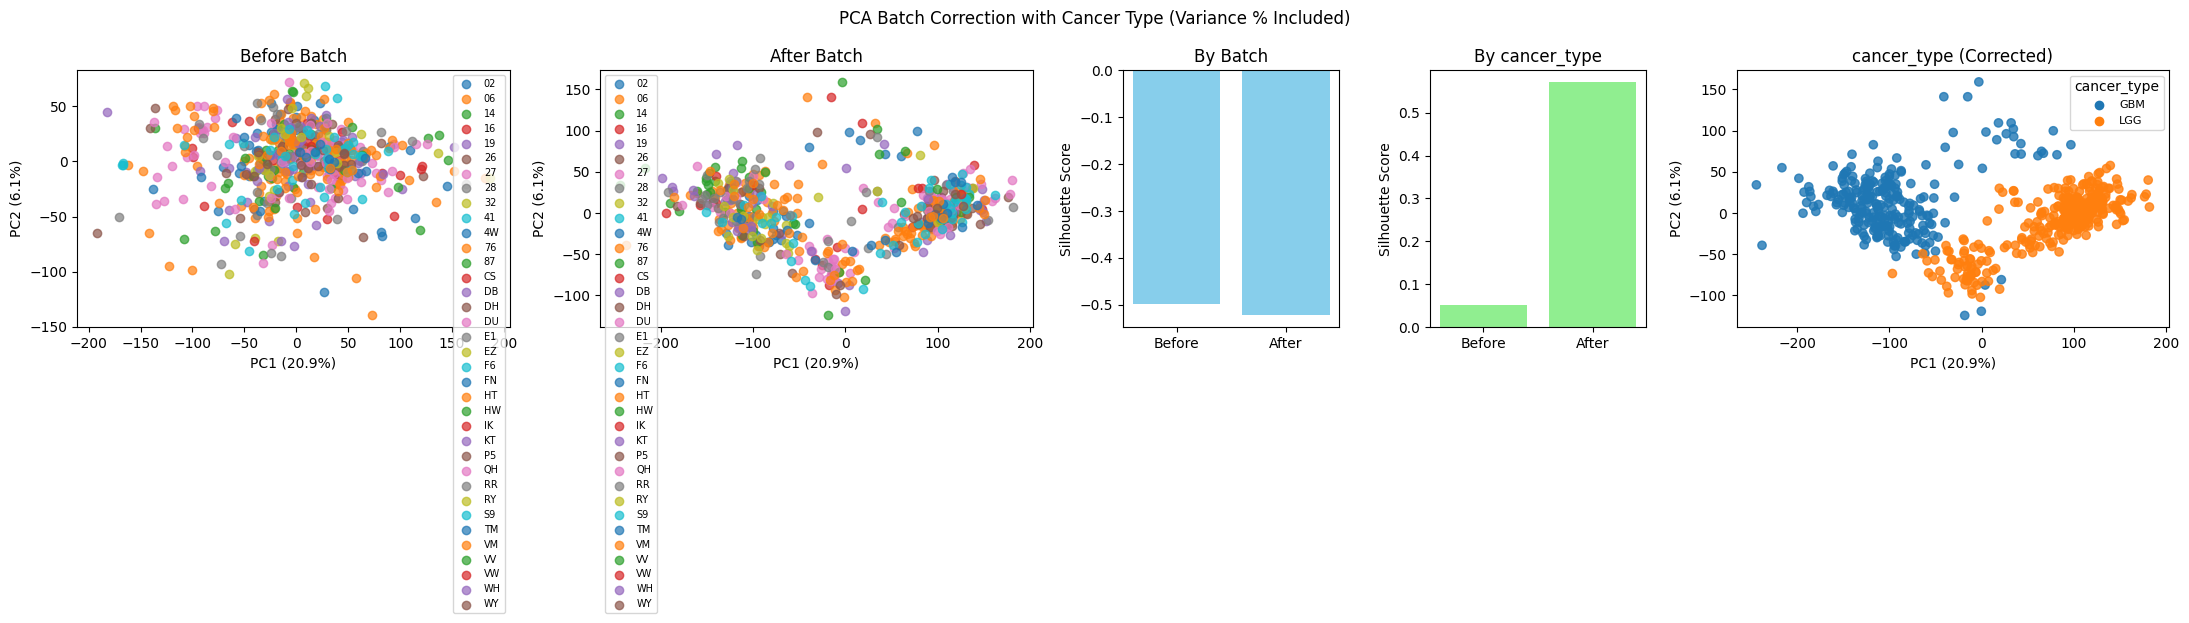

In [ ]:
evaluate_correction(
    train=methylation_train_batch_corrected,
    train_cor=methylation_train,
    metadata=methyl_train_super_meta,
    batch_col='platform',
    group_col='cancer_type',
    use_umap=False,  # PCA
    title="PCA Batch Correction with Cancer Type (Variance % Included)"
)

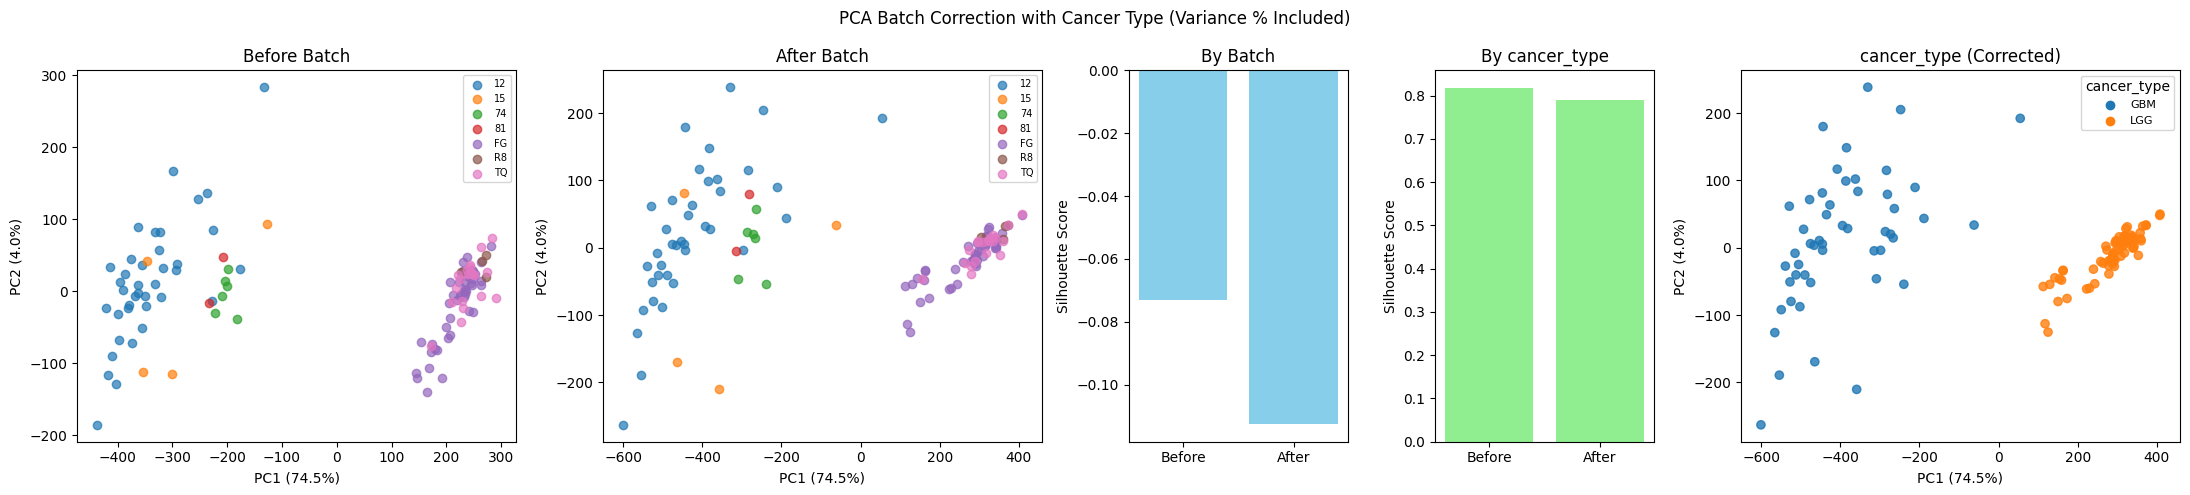

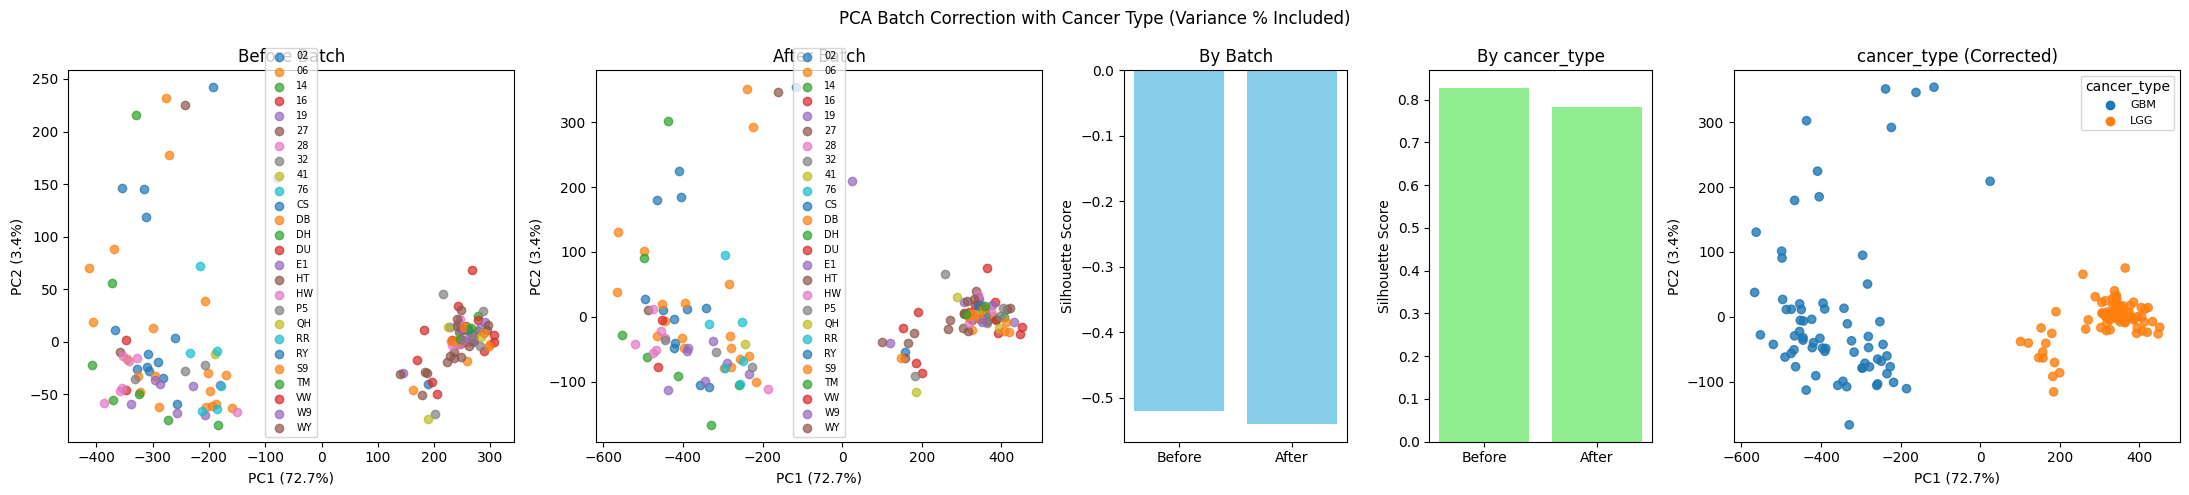

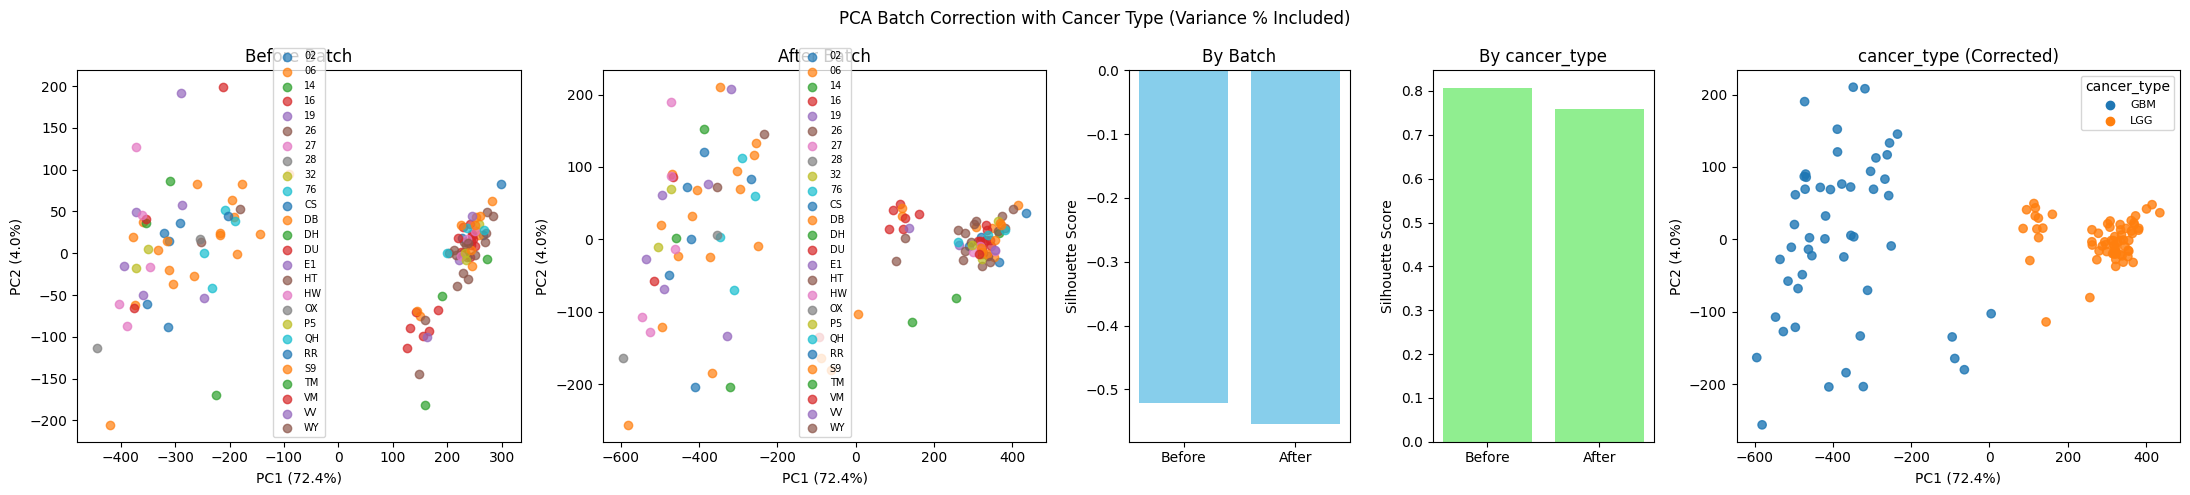

In [ ]:
# external data

evaluate_correction(
    train=methylation_external_test,
    train_cor=methylation_external_corrected_test,
    metadata=methyl_external_test_super_meta,
    batch_col='platform',
    group_col='cancer_type',
    use_umap=False,  # PCA
    title="PCA Batch Correction with Cancer Type (Variance % Included)"
)

#internal data
evaluate_correction(
    train=methylation_internal_test,
    train_cor=methylation_internal_corrected_test,
    metadata=methyl_internal_test_super_meta,
    batch_col='platform',
    group_col='cancer_type',
    use_umap=False,  # PCA
    title="PCA Batch Correction with Cancer Type (Variance % Included)"
)

#validation
evaluate_correction(
    train=methylation_val,
    train_cor=methylation_val_corrected,
    metadata=methyl_val_super_meta,
    batch_col='platform',
    group_col='cancer_type',
    use_umap=False,  # PCA
    title="PCA Batch Correction with Cancer Type (Variance % Included)"
)